In [1]:
import pandas as pd
import numpy as np
# import gmaps
# import gmaps.datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
import glob

# Loading Data

In [3]:
path = 'Data/*.csv'
allFiles = glob.glob(path)
data = pd.concat((pd.read_csv(f) for f in allFiles))

In [4]:
len(data)

1635156

# PreProcessing

In [5]:
sorted_data = data.sort_values('trip_start_timestamp')

In [6]:
# Slicing data into 2 hour time intervals
bin_interval = 2

def makeBins(x):
    date = x.split(' ')[0][5:]
    x=pd.to_datetime(x)
    return date + ' ' + str(int(x.hour/bin_interval)*bin_interval) + ":00"

sorted_data["bin"] = sorted_data["trip_start_timestamp"].apply(makeBins)

In [7]:
# Record the list of bins
bins = sorted(sorted_data["bin"].unique())

# For all the bins

In [8]:
X = sorted_data[sorted_data["bin"]==bins[0]]
pickuplocation = zip(X["pickup_latitude"], X["pickup_longitude"])
pickuplocation = np.asarray(pickuplocation)
    
db = DBSCAN(eps=0.0001, min_samples=5).fit(pickuplocation)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters: %d".format(n_clusters_))

filename = "PointsinBins/example.csv"
labels = labels.tolist()
X['label'] = labels
X.to_csv(filename, sep='\t')

number of clusters: %d


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
list_of_result = []

for bin_name in bins:
    # Extracting the data of each bin
    X = sorted_data[sorted_data["bin"]==bin_name]

    pickuplocation = zip(X["pickup_latitude"], X["pickup_longitude"])
    pickuplocation = np.asarray(pickuplocation)
    
    db = DBSCAN(eps=0.0001, min_samples=5).fit(pickuplocation)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("number of clusters: %d".format(n_clusters_))
    
    # filename
    filename = "PointsinBins/"+ bin_name + ".csv"
    
    labels = labels.tolist()
    X['label'] = labels
    X.to_csv(filename, sep='\t')

number of clusters: %d


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of c

number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d
number of clusters: %d


In [ ]:
list_of_result = []

for bin_name in bins:
    # Extracting the data of each bin
    X = sorted_data[sorted_data["bin"]==bin_name]

    pickuplocation = zip(X["pickup_latitude"], X["pickup_longitude"])
    pickuplocation = np.asarray(pickuplocation)
    
    db = DBSCAN(eps=0.0001, min_samples=5).fit(pickuplocation)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
    # Picname
    picname = bin_name + ".png"
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = pickuplocation[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = pickuplocation[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.savefig(picname)
        
    labels = labels.tolist()
    X['label'] = labels
    
    list_of_result.append(X)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Trial of one bin

In [12]:
X = sorted_data[sorted_data["bin"]==bins[0]]

In [13]:
pickuplocation = zip(X["pickup_latitude"], X["pickup_longitude"])
pickuplocation = np.asarray(pickuplocation)

In [14]:
db = DBSCAN(eps=0.0001, min_samples=5).fit(pickuplocation)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

136

In [15]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

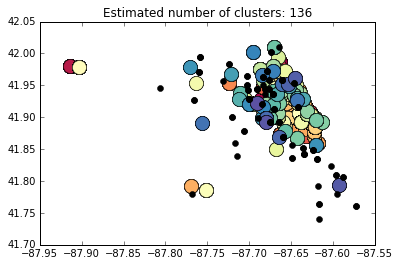

In [27]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pickuplocation[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pickuplocation[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('example.png')

In [26]:
plt.savefig('example.png')

In [18]:
labels = labels.tolist()

In [21]:
X['label'] = labels

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
X

,trip_start_timestamp,pickup_latitude,pickup_longitude,fare,tips,extras,trip_total,trip_seconds,trip_miles,bin,label
32730,2014-03-01 00:15:00 UTC,41.986712,-87.663416,8.05,0.00,1.0,9.05,480,2.20,03-01 0:00,0
66359,2014-03-01 00:15:00 UTC,41.928619,-87.685362,11.85,0.00,0.0,11.85,960,4.10,03-01 0:00,1
25957,2014-03-01 00:15:00 UTC,41.885300,-87.642808,4.25,0.00,1.5,5.75,180,0.30,03-01 0:00,2
20418,2014-03-01 00:15:00 UTC,41.878866,-87.625192,10.45,0.00,0.0,10.45,600,3.70,03-01 0:00,3
32753,2014-03-01 00:15:00 UTC,41.914747,-87.654007,5.85,0.00,1.0,6.85,300,1.40,03-01 0:00,4
121419,2014-03-01 00:15:00 UTC,41.922686,-87.649489,13.65,2.70,0.0,16.35,840,5.30,03-01 0:00,5
37922,2014-03-01 00:15:00 UTC,41.980264,-87.913625,76.05,0.00,3.0,79.05,3600,37.80,03-01 0:00,6
9729,2014-03-01 00:15:00 UTC,41.907492,-87.635760,10.85,2.37,1.0,14.22,900,0.35,03-01 0:00,7
104864,2014-03-01 00:15:00 UTC,41.890922,-87.618868,15.45,0.00,0.0,15.45,780,6.50,03-01 0:00,8
83056,2014-03-01 00:15:00 UTC,41.928967,-87.656157,6.25,0.00,0.0,6.25,360,1.30,03-01 0:00,9
